# Lernkurven und Parameterplots

Voraussetzungen:   
- Allgemeines Verständnis der Problemstellung beim supervised machine learning
- Insbesondere, dass das Ziel Verallgemeinerung ist, und die Gefahr das Overfitting
Die Lösung dieser Probleme besteht typischerweise in allgemeinen Prinzipien beim Vorgehen bei einem Klassifikationsproblem. Insbesondere muss fast immer zwingend: 
- jemand (Sie!) die Verantwortung übernehmen für ein korrektes Vorgehen beim Training. Diese Person wird auch Verallgemeinerungsaussagen gegenüber dem Auftragsteller verantworten müssen (z.B. dass das trainierte System auf neuen Daten mindestens eine Genauigkeit von 80% erreicht, o.ä.)
- sofort ein Testset ausgesondert werden, welches nur zu einem Zweck benutzt werden darf: Zur abschliessenden Beurteilung der Genauigkeit eines einzigen Klassifikators. 
- Alle weitere Arbeit wird auf den restlichen Daten vorgenommen. Diese werden oft wieder in ein Trainings- und ein Validierungsset eingeteilt (oft im Verhältnis 80%/20% o.ä.). Der Klassifikator erhält die Trainingsdaten um zu lernen. Die Validierungsdaten werden benutzt, um die Genauigkeit des Klassifikators zu messen. 
- Je öfter Sie die Ergebnisse auf dem Validierungsset anschauen und danach (mit dieser Einsicht) einen neuer Klassifikator trainieren, umso schlechter wird die Verallgemeinerungsfähigkeit der aus dem Validierungsdatensatz gezogenen Schlüsse. Diese Art der "Kontaminierung" der Validierungsdaten soll auf dem Testset so strikt wie möglich verhindert werden. 

**In diesem Notebook betrachten wir Methoden, um Parameter eines Klassifikators zu setzen. Präziser: Um aus einem Hypothesenset einen geeigneten Kandidaten auszuwählen, der nur so viel von den Trainings- und Validierungsdaten lernt, wie er auf das Testset verallgemeinern kann.**

In [1]:
import pandas as pd
import numpy as np
import sklearn
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
np.set_printoptions(precision=3)
%matplotlib inline

In [2]:
#Lade die Daten
#Die 'ID'-Spalte ist offensichtlich nur ein Index. Benutzen wir in ebenso:
df=pd.read_csv('./UCI_train.csv',index_col='ID')

# Allgemeiner Überblick

- Verschaffen Sie sich mit Pandas einen Überblick über den Datensatz. 
- Erstellen Sie ein Trainings- und ein Testdatensatz, Xtrain und Xtest, sowie die zugehörigen Zielvariable ytrain und ytest. 20% der Daten sollen ins Testset. Arbeiten Sie nur ansonsten möglichst nur mit dem Trainingsset (siehe allerletzte Frage in diesem Notebook: Sie wollen Ihre Verallgemeinerungsfähigkeit nicht gefährden!).

# KNN Parameterplot

Parameterplots sind Plots, welche eine Qualitätsgrösse (einen Score) eines Klassifikators gegen den Wert eines seiner Hyperparameter zeigt. Daran kann oft ein guter Wert abgelesen werden. Sinnvollerweise wird der Score cross-validiert bestimmt, d.h. mit einem Unsicherheits-Band versehen. Eine Vorlage dafür findet sich hier:

http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

Aufgabe: Überprüfuen Sie, ob es sich lohnt, den nun folgenden Parameter-Plot um diese Unsicherheitsbänder zu verbessern. Können Sie die untenstehenden Zellen in eine for-Schleife verpacken?

In [3]:
from sklearn.metrics import accuracy_score

def evaluate_accuracy(knn,Xtrain,ytrain,scoresList,cvscoresList,cv=10):
    knn.fit(Xtrain,ytrain)
    scores=accuracy_score(knn.predict(Xtrain),ytrain)
    print("training accuracy %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    cvscores=cross_val_score(knn,Xtrain,ytrain,cv=cv)
    print("Cross-validation accuracy: %0.2f (+/- %0.2f)" % (cvscores.mean(), cvscores.std() * 2))
    scoresList.append(scores.mean())
    cvscoresList.append(cvscores.mean())
    return scoresList,cvscoresList

In [4]:
tal=[]
cval=[]
n_neighbors_list=[1,2,3,5,20,100,500]

In [5]:
Xtrain = df[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
Xtrain = Xtrain.to_numpy()
ytrain = df['default.payment.next.month']
ytrain = ytrain.to_numpy()

In [6]:
for n in n_neighbors_list:
    knn=sklearn.neighbors.KNeighborsClassifier(n_neighbors=n)
    tal,cval=evaluate_accuracy(knn,Xtrain,ytrain,tal,cval)

training accuracy 1.00 (+/- 0.00)
Cross-validation accuracy: 0.70 (+/- 0.02)
training accuracy 0.84 (+/- 0.00)
Cross-validation accuracy: 0.76 (+/- 0.01)
training accuracy 0.84 (+/- 0.00)
Cross-validation accuracy: 0.73 (+/- 0.02)
training accuracy 0.82 (+/- 0.00)
Cross-validation accuracy: 0.75 (+/- 0.02)
training accuracy 0.79 (+/- 0.00)
Cross-validation accuracy: 0.78 (+/- 0.01)
training accuracy 0.78 (+/- 0.00)
Cross-validation accuracy: 0.78 (+/- 0.01)
training accuracy 0.78 (+/- 0.00)
Cross-validation accuracy: 0.78 (+/- 0.00)


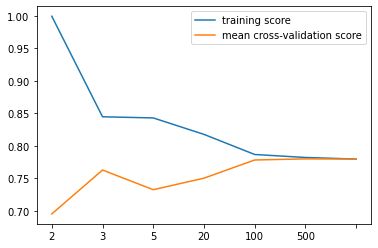

In [7]:
ax=plt.subplot(1,1,1)
ax.plot(np.arange(len(tal)),tal,label='training score');
ax.plot(np.arange(len(cval)),cval,label='mean cross-validation score');
ax.set_xticklabels(n_neighbors_list)
plt.legend();

In [8]:
# Bestes Resultat mit KNN:
# knn=sklearn.neighbors.KNeighborsClassifier(n_neighbors=20)
# tal,cval=evaluate_accuracy(knn,Xtrain,ytrain,tal,cval)

training accuracy 0.79 (+/- 0.00)
Cross-validation accuracy: 0.78 (+/- 0.01)


# KNN Lernkurve für $k=20$

Lernkurven zeigen, wie gut sich ein Klassifikator verbessert, wenn er mehr Daten zum trainieren erhält. Lernkurven sind Plots des Scores (z.B. der Genauigkeit) gegen die Grösse des Trainingssets.

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

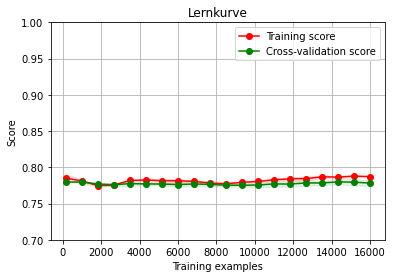

In [12]:
knn=sklearn.neighbors.KNeighborsClassifier(n_neighbors=20)
plot_learning_curve(knn, "Lernkurve", Xtrain, ytrain, 
                    train_sizes=np.linspace(0.01, 1.0, 20),ylim=(0.7,1.0), n_jobs=4);

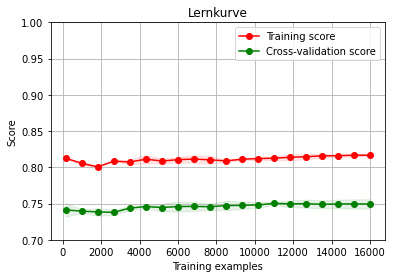

In [13]:
knn=sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
plot_learning_curve(knn, "Lernkurve", Xtrain, ytrain, 
                    train_sizes=np.linspace(0.01, 1.0, 20),ylim=(0.7,1.0), n_jobs=4);

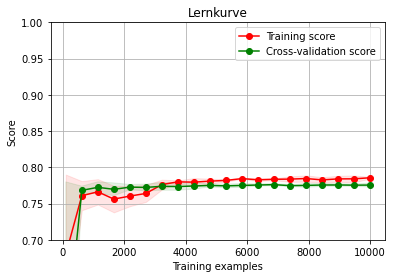

In [19]:
knn=sklearn.neighbors.KNeighborsClassifier(n_neighbors=20)
plot_learning_curve(knn, "Lernkurve", Xtrain, ytrain, 
                    train_sizes=np.linspace(0.01, 1.0, 20),ylim=(0.7,1.0), cv=2, n_jobs=4);

Es interessiert nun:  
- Was bedeuten die Kurven? 
- Welchen Einfluss hat die Grösse des Trainingssets?
- Wie verändern sie sich? Z.B. bei Veränderung von N (n_neighbors), dem Plot Range, dem Cross-Validation-Parameter etc.
- Welche Ihrer Eigenschaften können Sie erklären? Sollte z.B. die Trainingskurve immer über der Testkurve liegen?
- Was passiert bei wenn N=1 (Anzahl nearest neighbours)?  
- Liegt ein Overfitting vor?

** Finden Sie einen geeigneten Klassifikator. Deckt er sich mit dem im ParameterSearch gefundenen?**  
** Welche Verallgemeinerungsgenauigkeit werden Sie Ihrem Auftraggeber versprechen?**

## Antworten
### Was bedeuten die Kurven?
Die Kurven zeigen die cross validierten training und test scores im Verhältnis zu der Anzahl Trainingsdaten.
### Welchen Einfluss hat die Grösse des Trainingssets?
In unserem Fall mit n=20 ändern sich die Kurven kaum, egal wie gross das Traininsset ist. Die Scores betragen immer ca. 0.78.
### Wie verändern sie sich?
Mit einem kleineren n-Wert (n=5) steigt der trainings score auf >0.8, der test score sinkt jedoch auf ~0.75.
Bei einem grösserer Wert (n=30) verändern sich die scores kaum.
Ein Cross-Validation-Parameter von 2 (default ist 5), führt dazu, dass der Unsicherheitsbereich bei der Anzahl Trainingsdaten grösser wird. Jedoch nur bis ~3000 Trainingssets, danach stabilisieren sich die scores erneut bei ~0.78. 
### Welche Ihrer Eigenschaften können Sie erklären?
Der kleine n-Wert führt zu einem overfitting, was den höheren Trainingsscore und den tieferen Testscore erklärt. 
Die Trainingskurve liegt höher als die Testkurve, da das Modell auf den Trainingsdaten trainiert ist und diese somit besser hervorsagen kann. Mit der Erhöhung der Anzahl Testdaten sollten sich die Kurven jedoch nähern, da mit mehr Trainingsdaten bessere Voraussagen getroffen werden können.
### Was passiert bei wenn N=1 (Anzahl nearest neighbours)?  
Der training score ist immer 1, der test score jedoch unter 0.7. Der training score von 1 ist typisch für 1-nearest-neighbor, da damit nur genau auf die Trainingsdaten geschaut wird. Es liegt somit ein overfitting vor, was den tiefen test Wert erklärt.
### Liegt ein Overfitting vor?
Da die Trainingskurve und die Testkurve sehr nah beieinander liegen, sollte kein Overfitting vorliegen. Die Kurven sagen aus, dass das Modell auch mit Unbekannten Daten eine gleich gute Voraussage machen kann.
